In [313]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [314]:
# Load the dataset
df = pd.read_csv('Absenteeism_at_work.csv', delimiter=';')
df=pd.DataFrame(df)
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


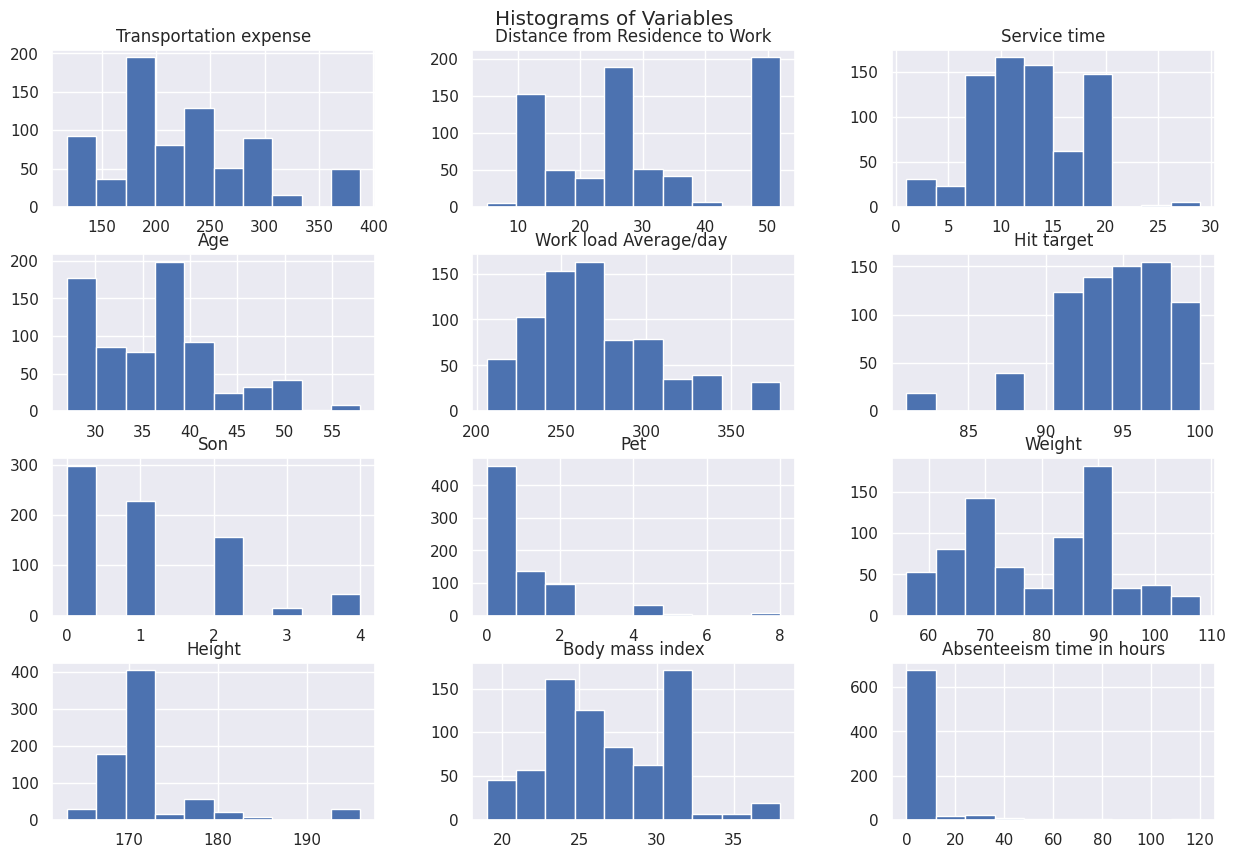

In [315]:
# Presentation of variables: Histograms
df.drop(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
         'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker'], axis=1).hist(figsize=(15, 10))
plt.suptitle("Histograms of Variables", y=0.92)
plt.show()

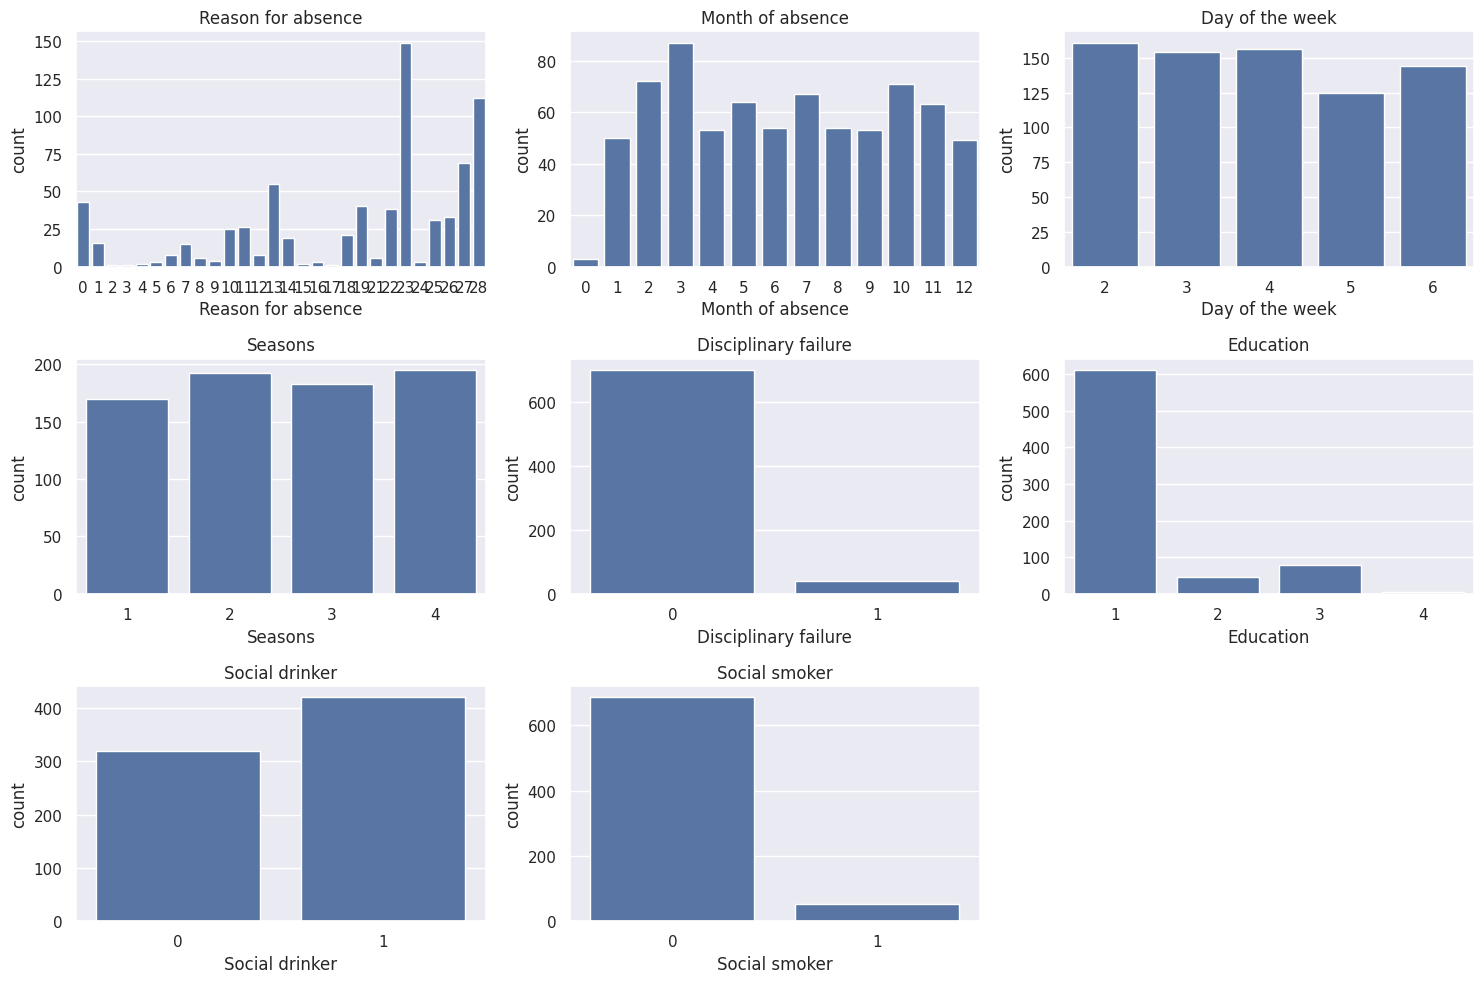

In [316]:
# Presentation of variables: Boxplots for categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                         'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

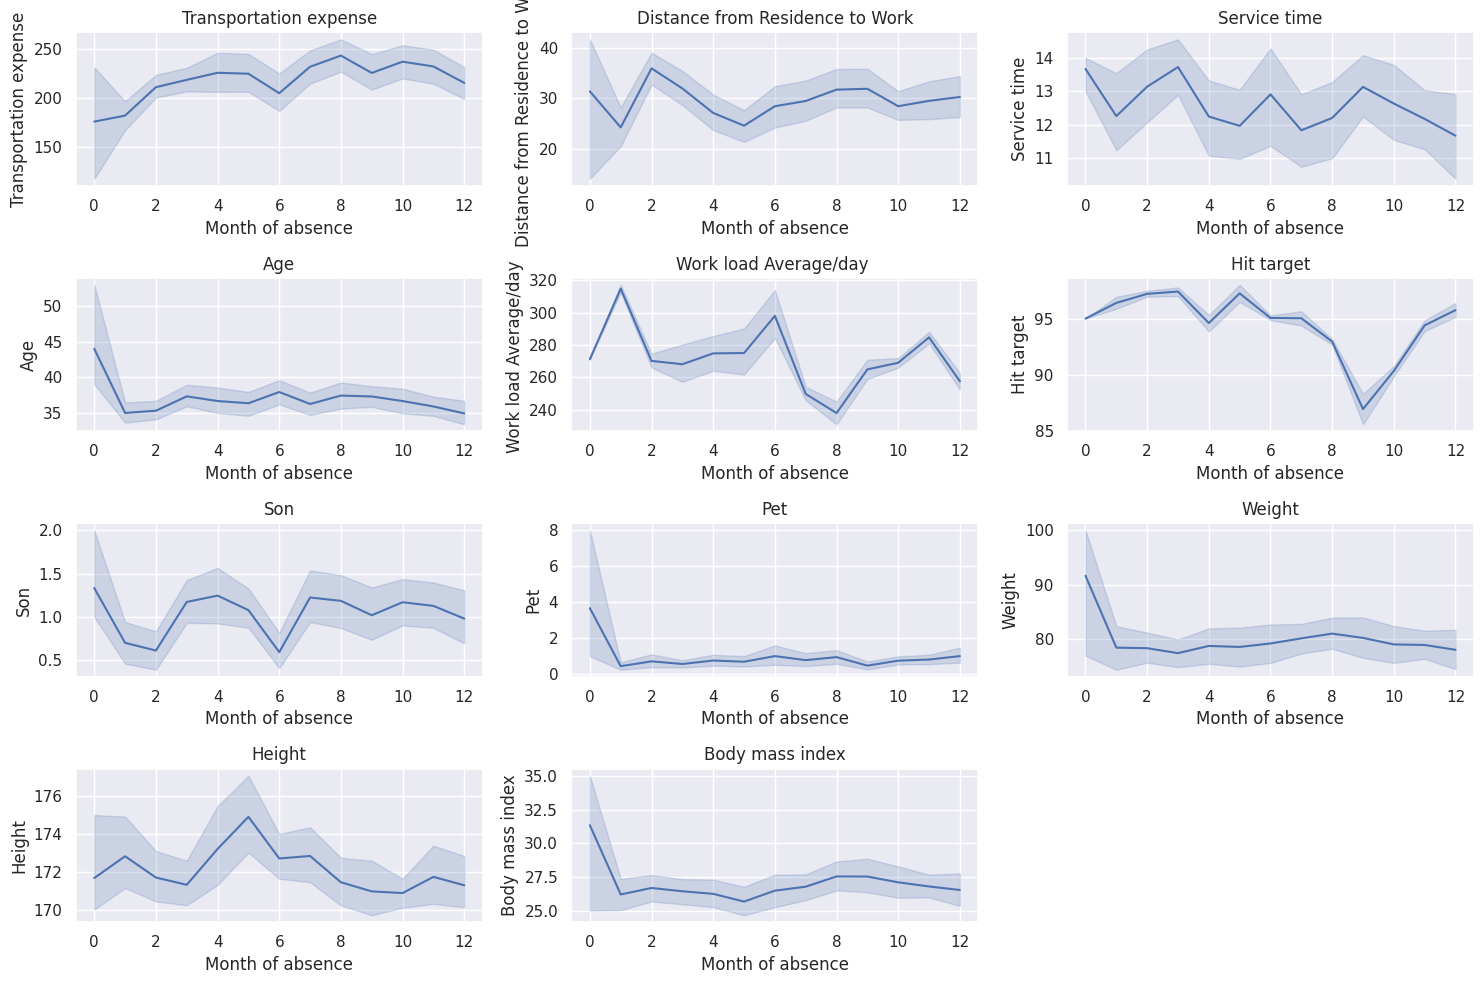

In [317]:
# Trend presentations: Line plots for trends over time
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Transportation expense', 'Distance from Residence to Work', 'Service time',
                         'Age', 'Work load Average/day ', 'Hit target', 'Son', 'Pet', 'Weight', 'Height',
                         'Body mass index']):
    plt.subplot(4, 3, i + 1)
    sns.lineplot(data=df, x='Month of absence', y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

Unique Values for 'Seasons': ['summer' 'spring' 'autumn' 'winter']
Unique Values for 'Education': [1 3 2 4]


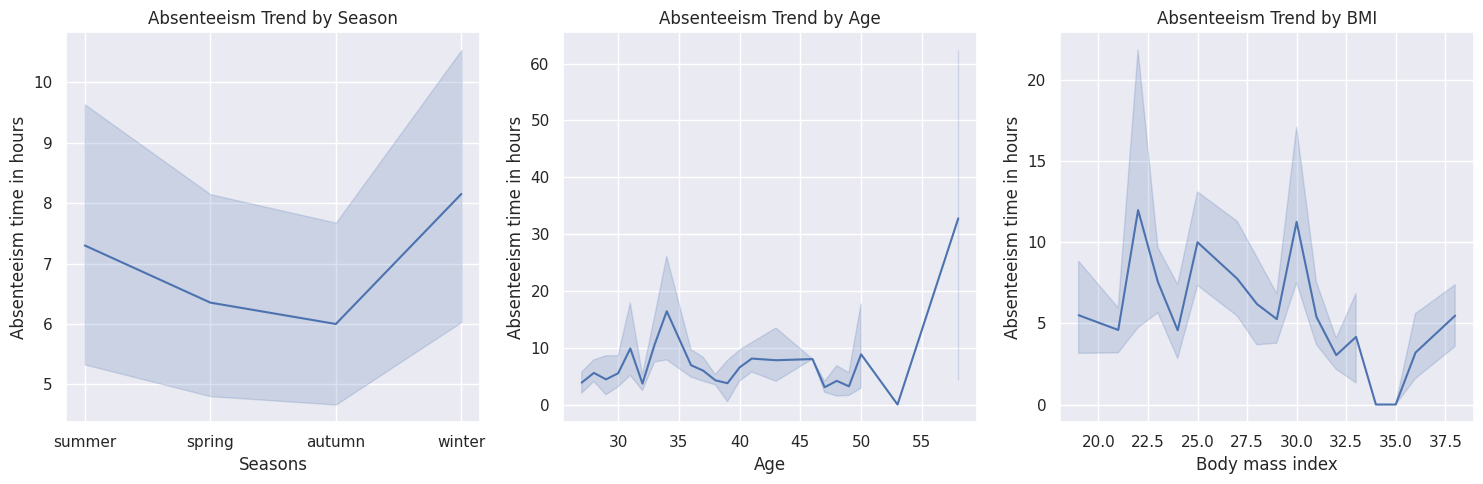

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numerical values to season names
season_mapping = {1: 'summer', 2: 'autumn', 3: 'winter', 4: 'spring'}
df['Seasons'] = df['Seasons'].map(season_mapping)

# Print unique values to verify mapping
print("Unique Values for 'Seasons':", df['Seasons'].unique())
print("Unique Values for 'Education':", df['Education'].unique())

# Trend presentations: Line plots for absenteeism trend based on different factors
plt.figure(figsize=(15, 5))

# Trend based on season
plt.subplot(1, 3, 1)
sns.lineplot(data=df, x='Seasons', y='Absenteeism time in hours', estimator='mean')
plt.title("Absenteeism Trend by Season")

# Trend based on age
plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='Age', y='Absenteeism time in hours', estimator='mean')
plt.title("Absenteeism Trend by Age")

# Trend based on body mass index (BMI)
plt.subplot(1, 3, 3)
sns.lineplot(data=df, x='Body mass index', y='Absenteeism time in hours', estimator='mean')
plt.title("Absenteeism Trend by BMI")

plt.tight_layout()
plt.show()


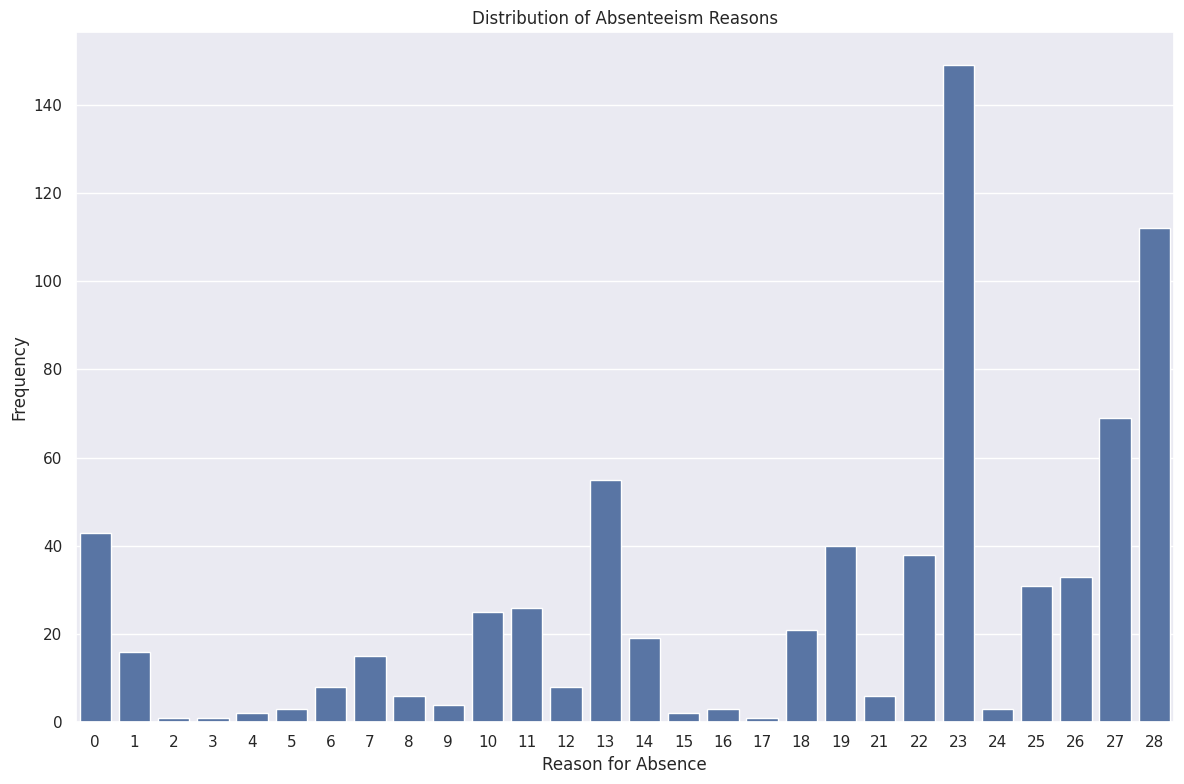

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend presentations: Bar plot for absenteeism reasons
plt.figure(figsize=(12, 8))

# Bar plot based on reasons for absenteeism
sns.countplot(data=df, x='Reason for absence')
plt.title("Distribution of Absenteeism Reasons")
plt.xlabel("Reason for Absence")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



In [320]:
# Diagnose the data: print unique values for 'Reason for absence'
print("Unique Values for 'Reason for absence':", df['Reason for absence'].unique())


Unique Values for 'Reason for absence': [26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16]


<ipython-input-321-0a13a8c4f7bd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


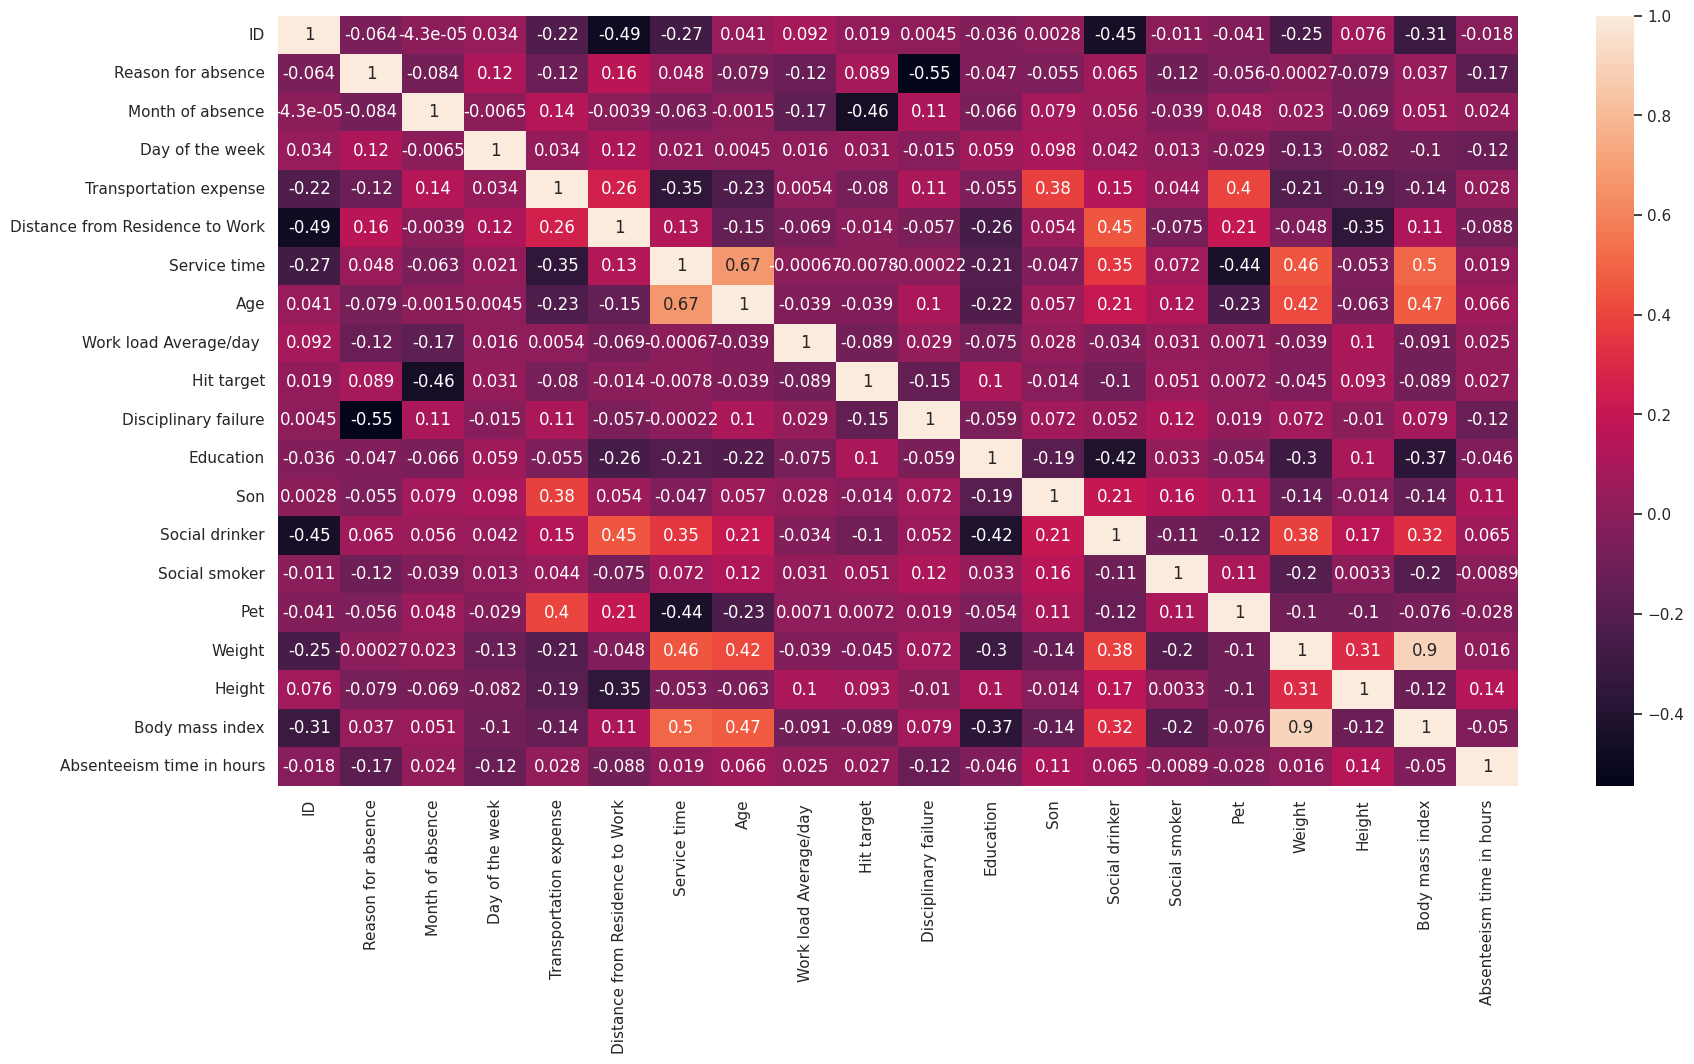

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20 ,10)})
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Axes: ylabel='Absenteeism time in hours'>

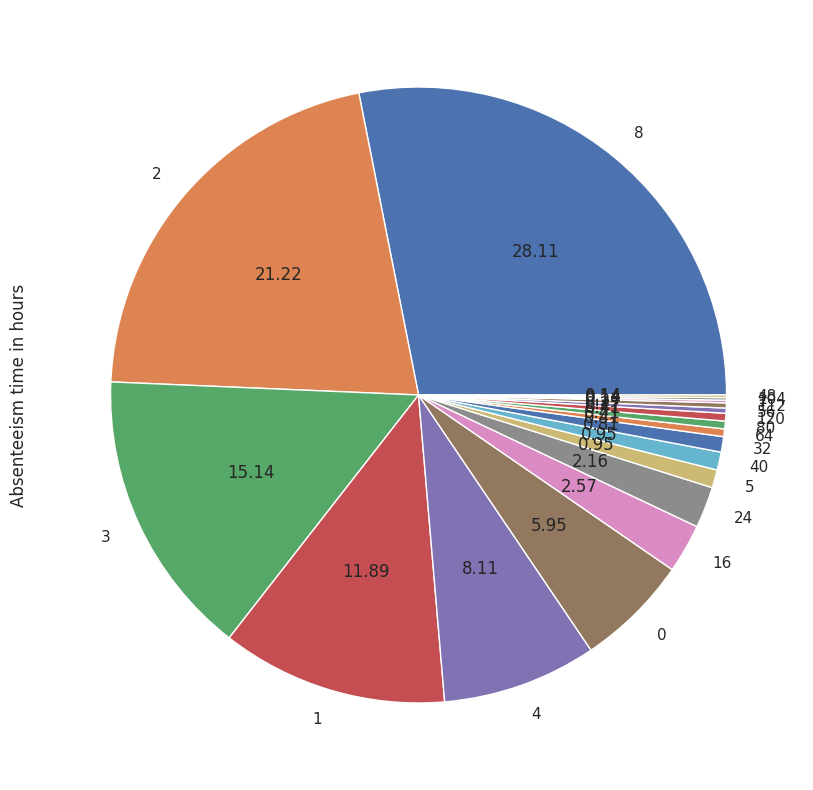

In [322]:
# dataset is imbalanced
df['Absenteeism time in hours'].value_counts().plot.pie(autopct='%.2f')
# it is not imbalanced

In [323]:
# Split data into features (X) and target (y) for regression
X_reg = df.drop('Absenteeism time in hours', axis=1)
y_reg = df['Absenteeism time in hours']

In [324]:
# Split the dataset into train and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [325]:
# Split the dataset into train and test sets for logistic regression
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_logreg, y_logreg, test_size=0.2, random_state=42)

In [326]:
# Initialize linear regression model
reg_model = LinearRegression()

In [327]:
# Importing pandas
import pandas as pd
import statsmodels.api as sm

# Assuming 'df' is your DataFrame containing the data

# Selecting only the numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number'])

# Creating an empty dictionary to store correlations, regression coefficients, and p-values
correlations = {}
regression_coefficients = {}
p_values = {}

# Looping through each numeric column to calculate correlation with 'Absenteeism time in hours'
for column in numeric_columns.columns:
    correlation = df['Absenteeism time in hours'].corr(df[column])
    correlations[column] = correlation

    # Now let's perform linear regression
    X_reg = df[[column]]  # Selecting the current column as feature
    y_reg = df['Absenteeism time in hours']  # Target variable

    # Adding a constant term to the predictor
    X_reg = sm.add_constant(X_reg)

    # Fit the OLS model
    model = sm.OLS(y_reg, X_reg).fit()

    # Store the regression coefficient and p-value
    regression_coefficients[column] = model.params[column]
    p_values[column] = model.pvalues[column]

# Converting the dictionaries into DataFrames for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Factor', 'Correlation'])
regression_df = pd.DataFrame(list(regression_coefficients.items()), columns=['Factor', 'Regression Coefficient'])
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Factor', 'P-value'])

# Merging the DataFrames on the 'Factor' column
result_df = pd.merge(correlation_df, regression_df, on='Factor')
result_df = pd.merge(result_df, p_values_df, on='Factor')

print(result_df)



                             Factor  Correlation  Regression Coefficient  \
0                                ID    -0.017997               -0.021768   
1                Reason for absence    -0.173116               -0.273650   
2                  Month of absence     0.024345                0.094447   
3                   Day of the week    -0.124361               -1.166125   
4            Transportation expense     0.027585                0.005492   
5   Distance from Residence to Work    -0.088363               -0.079395   
6                      Service time     0.019029                0.057853   
7                               Age     0.065760                0.135310   
8            Work load Average/day      0.024749                0.008447   
9                        Hit target     0.026695                0.094163   
10             Disciplinary failure    -0.124248               -7.320000   
11                        Education    -0.046235               -0.915518   
12          

In [328]:
# Importing pandas
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Selecting only the numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number'])

# Creating an empty dictionary to store correlations
correlations = {}

# Looping through each numeric column to calculate correlation with 'Absenteeism time in hours'
for column in numeric_columns.columns:
    correlation = df['Absenteeism time in hours'].corr(df[column])
    correlations[column] = correlation

# Converting the dictionary into a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Factor', 'Correlation'])

print(correlation_df)




                             Factor  Correlation
0                                ID    -0.017997
1                Reason for absence    -0.173116
2                  Month of absence     0.024345
3                   Day of the week    -0.124361
4            Transportation expense     0.027585
5   Distance from Residence to Work    -0.088363
6                      Service time     0.019029
7                               Age     0.065760
8            Work load Average/day      0.024749
9                        Hit target     0.026695
10             Disciplinary failure    -0.124248
11                        Education    -0.046235
12                              Son     0.113756
13                   Social drinker     0.065067
14                    Social smoker    -0.008936
15                              Pet    -0.028277
16                           Weight     0.015789
17                           Height     0.144420
18                  Body mass index    -0.049719
19        Absenteeis

In [329]:
# Sort the correlation DataFrame by absolute correlation values
result_df['Absolute Correlation'] = result_df['Correlation'].abs()
result_df_sorted = result_df.sort_values(by='Absolute Correlation', ascending=False)

# Select the top factors with the strongest correlations
strongest_correlations = result_df_sorted.iloc[1:6]  # Exclude the target variable itself

print("Factors with the strongest correlations with Absenteeism time in hours:")
print(strongest_correlations)

Factors with the strongest correlations with Absenteeism time in hours:
                  Factor  Correlation  Regression Coefficient   P-value  \
1     Reason for absence    -0.173116               -0.273650  0.000002   
17                Height     0.144420                0.319018  0.000081   
3        Day of the week    -0.124361               -1.166125  0.000698   
10  Disciplinary failure    -0.124248               -7.320000  0.000706   
12                   Son     0.113756                1.380521  0.001939   

    Absolute Correlation  
1               0.173116  
17              0.144420  
3               0.124361  
10              0.124248  
12              0.113756  


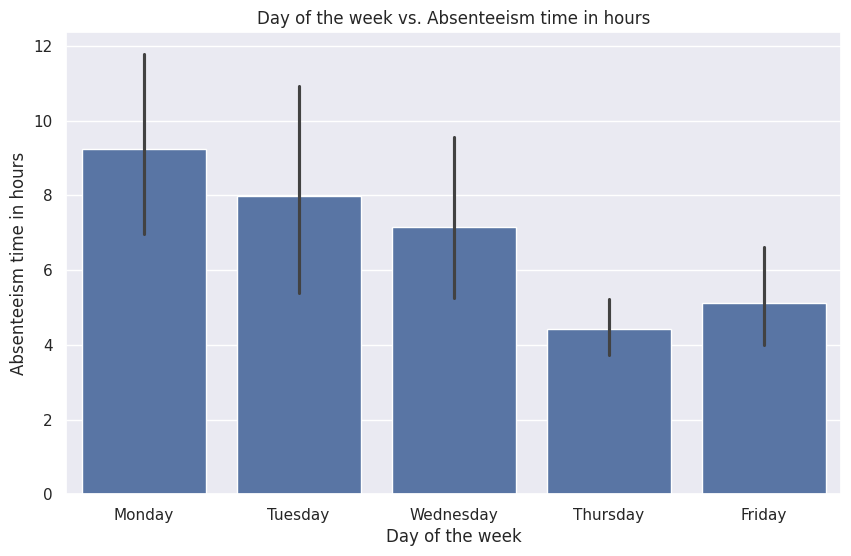

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for 'Day of the week' vs. 'Absenteeism time in hours'
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Day of the week', y='Absenteeism time in hours')

# Adding labels to the x-axis based on the provided mapping
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Adding title and labels
plt.title('Day of the week vs. Absenteeism time in hours')
plt.xlabel('Day of the week')
plt.ylabel('Absenteeism time in hours')

# Show the plot
plt.show()



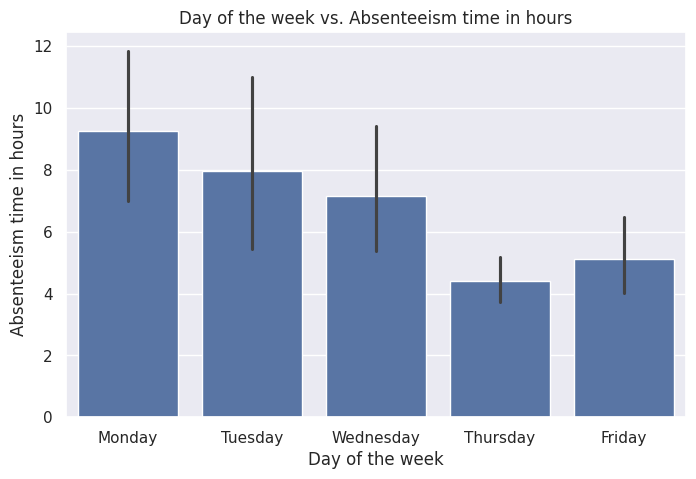

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for 'Day of the week' vs. 'Absenteeism time in hours'
plt.figure(figsize=(8, 5))  # Adjust the width and height as needed
sns.barplot(data=df, x='Day of the week', y='Absenteeism time in hours')

# Adding labels to the x-axis based on the provided mapping
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Adding title and labels
plt.title('Day of the week vs. Absenteeism time in hours')
plt.xlabel('Day of the week')
plt.ylabel('Absenteeism time in hours')

# Show the plot
plt.show()


<ipython-input-332-33601a391e5b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day of the week', y='Absenteeism time in hours', ci=None)


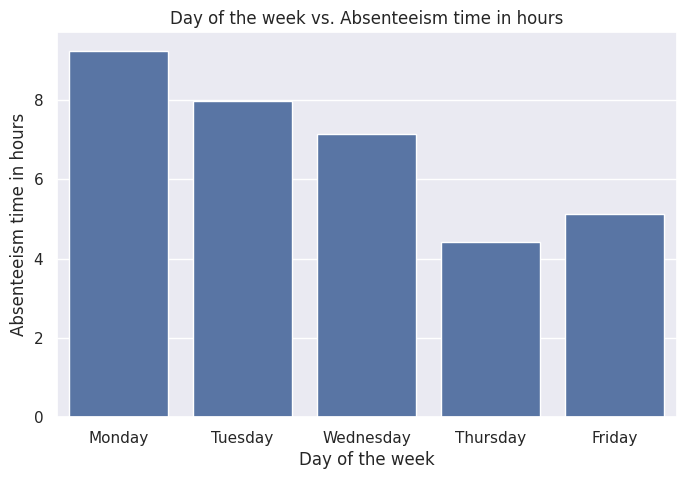

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for 'Day of the week' vs. 'Absenteeism time in hours'
plt.figure(figsize=(8, 5))  # Adjust the width and height as needed
sns.barplot(data=df, x='Day of the week', y='Absenteeism time in hours', ci=None)

# Adding labels to the x-axis based on the provided mapping
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Adding title and labels
plt.title('Day of the week vs. Absenteeism time in hours')
plt.xlabel('Day of the week')
plt.ylabel('Absenteeism time in hours')

# Show the plot
plt.show()



<ipython-input-333-c756245345c4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Height', y='Absenteeism time in hours', ci=None)


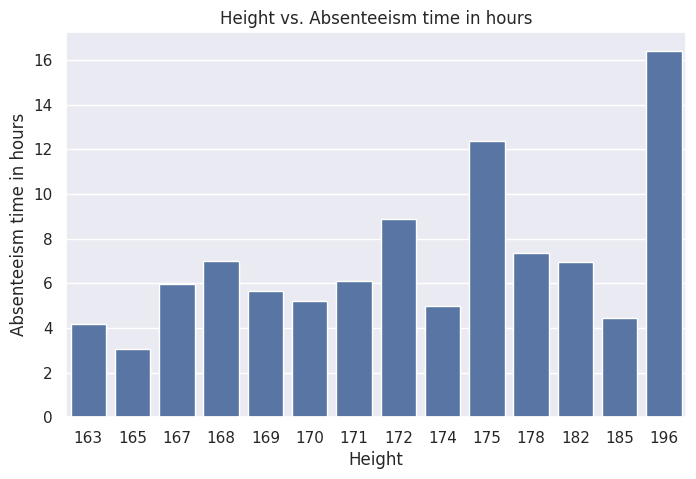

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for 'Height' vs. 'Absenteeism time in hours'
plt.figure(figsize=(8, 5))  # Adjust the width and height as needed
sns.barplot(data=df, x='Height', y='Absenteeism time in hours', ci=None)

# Adding title and labels
plt.title('Height vs. Absenteeism time in hours')
plt.xlabel('Height')
plt.ylabel('Absenteeism time in hours')

# Show the plot
plt.show()


In [334]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Selecting features and target
X = df.drop(['ID', 'Absenteeism time in hours'], axis=1)
y = df['Absenteeism time in hours'].apply(lambda x: 1 if x > 0 else 0)

# Define the columns to be one-hot encoded
categorical_cols = ['Seasons']  # Assuming 'Seasons' is the categorical column

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the logistic regression model
logreg = LogisticRegression()

# Create a pipeline combining preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logreg)])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.94594595 0.93918919 0.93918919 0.93918919 0.93918919]
Mean Accuracy: 0.9405405405405405


In [335]:
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_validate

# Define scorers for each metric
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Scores:")
print("Accuracy:", cv_results['test_accuracy'])
print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("ROC-AUC:", cv_results['test_roc_auc'])
print("Mean ROC-AUC:", cv_results['test_roc_auc'].mean())
print("F1-score:", cv_results['test_f1'])
print("Mean F1-score:", cv_results['test_f1'].mean())
print("Precision:", cv_results['test_precision'])
print("Mean Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'])
print("Mean Recall:", cv_results['test_recall'].mean())



Cross-Validation Scores:
Accuracy: [0.94594595 0.93918919 0.93918919 0.93918919 0.93918919]
Mean Accuracy: 0.9405405405405405
ROC-AUC: [0.5 0.5 0.5 0.5 0.5]
Mean ROC-AUC: 0.5
F1-score: [0.97222222 0.96864111 0.96864111 0.96864111 0.96864111]
Mean F1-score: 0.9693573364305073
Precision: [0.94594595 0.93918919 0.93918919 0.93918919 0.93918919]
Mean Precision: 0.9405405405405405
Recall: [1. 1. 1. 1. 1.]
Mean Recall: 1.0


In [336]:
#Based on the cross-validation scores and the mean accuracy you obtained, it seems that your model is performing reasonably well and is not showing signs of overfitting.

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Selecting features and target
X = df.drop(['ID', 'Absenteeism time in hours'], axis=1)
y = df['Absenteeism time in hours'].apply(lambda x: 1 if x > 0 else 0)

# Define categorical columns
categorical_cols = ['Seasons']  # Assuming 'Seasons' is the categorical column

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing to features
X_encoded = preprocessor.fit_transform(X)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X_encoded, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean Accuracy (Random Forest):", cv_scores_rf.mean())


Cross-Validation Scores (Random Forest): [0.94594595 0.93918919 0.93918919 0.93918919 0.93918919]
Mean Accuracy (Random Forest): 0.9405405405405405


In [338]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score

# Selecting features and target
X = df.drop(['ID', 'Absenteeism time in hours'], axis=1)
y = df['Absenteeism time in hours'].apply(lambda x: 1 if x > 0 else 0)

# Define categorical columns
categorical_cols = ['Seasons']  # Assuming 'Seasons' is the categorical column

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing to features
X_encoded = preprocessor.fit_transform(X)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Define scorers for each metric
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cv_results_rf = cross_validate(rf_classifier, X_encoded, y, cv=5, scoring=scoring)

# Print cross-validation scores
print("Cross-Validation Scores (Random Forest):")
print("Accuracy:", cv_results_rf['test_accuracy'])
print("Mean Accuracy:", cv_results_rf['test_accuracy'].mean())
print("ROC-AUC:", cv_results_rf['test_roc_auc'])
print("Mean ROC-AUC:", cv_results_rf['test_roc_auc'].mean())
print("F1-score:", cv_results_rf['test_f1'])
print("Mean F1-score:", cv_results_rf['test_f1'].mean())
print("Precision:", cv_results_rf['test_precision'])
print("Mean Precision:", cv_results_rf['test_precision'].mean())
print("Recall:", cv_results_rf['test_recall'])
print("Mean Recall:", cv_results_rf['test_recall'].mean())



Cross-Validation Scores (Random Forest):
Accuracy: [0.94594595 0.93918919 0.93918919 0.93918919 0.93918919]
Mean Accuracy: 0.9405405405405405
ROC-AUC: [0.5 0.5 0.5 0.5 0.5]
Mean ROC-AUC: 0.5
F1-score: [0.97222222 0.96864111 0.96864111 0.96864111 0.96864111]
Mean F1-score: 0.9693573364305073
Precision: [0.94594595 0.93918919 0.93918919 0.93918919 0.93918919]
Mean Precision: 0.9405405405405405
Recall: [1. 1. 1. 1. 1.]
Mean Recall: 1.0


In [339]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9405405405405405


In [340]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define logistic regression model
logreg = LogisticRegression()

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),  # Ensure no centering for sparse matrices
                           ('classifier', logreg)])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall'
}

# Perform cross-validation with the best estimator
cv_results = cross_validate(grid_search.best_estimator_, X, y, cv=5, scoring=scoring)

# Print the mean scores for each metric
for metric in scoring:
    print(f"Mean {metric.capitalize()}: {cv_results['test_' + metric].mean()}")


Best Parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}
Best Score: 0.9405405405405405
Mean Accuracy: 0.9405405405405405
Mean F1: 0.9693573364305073
Mean Roc_auc: 0.6113866050017129
Mean Precision: 0.9405405405405405
Mean Recall: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 